<h1 align='center'>
<p style='color:yellow'>
<b>
DETECT CREDIT FRAUD BY USING SVM MODEL
</b>
</p>
</h1>

## **| Process**

1. Read and Load data
2. Data analysis
3. Data Preprocessing
4. Feature Engineering
5. Split data

<br>

<h2 align='center'>
<span style='background:black; color:yellow'>
<b>
1 | Read and Load data
</b>
</span>
</h2>
<br>

Churn rate is a marketing metric that describes the number of customers who leave a business over a specific period of time. Each user is assigned a prediction value that estimates our churn rate at any given time. This value is based on: User demographics based on Browsing behavior, i.e. past purchase data, and other information.

It takes into account unique and exclusive predictions about how long a user will be a customer. This score $(\in [1, 5])$ is updated daily for all users who have at least one conversion.

In [1]:
import numpy as np
import pandas as pd

import os
import sys
sys.path.append(os.path.abspath('../'))
import utils

In [2]:
df = utils.read_dataset('credit_fraud.csv')

The first three rows of this data frame:


,Unnamed: 0,ID,GENDER,CAR,REALITY,NO_OF_CHILD,INCOME,INCOME_TYPE,EDUCATION_TYPE,FAMILY_TYPE,HOUSE_TYPE,FLAG_MOBIL,WORK_PHONE,PHONE,E_MAIL,FAMILY SIZE,BEGIN_MONTH,AGE,YEARS_EMPLOYED,TARGET
0,0,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,2.0,29,59,3,0
1,1,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,4,52,8,0
2,2,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,26,52,8,0


Description of this dataframe:


,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,25134.0,1.256650e+04,7255.705169,0.0,6283.25,12566.5,18849.75,25133.0
ID,25134.0,5.078838e+06,41941.018788,5008806.0,5042228.25,5079004.0,5115603.75,5150487.0
NO_OF_CHILD,25134.0,5.123339e-01,0.787785,0.0,0.00,0.0,1.00,19.0
INCOME,25134.0,1.948339e+05,104510.987243,27000.0,135000.00,180000.0,225000.00,1575000.0
FLAG_MOBIL,25134.0,1.000000e+00,0.000000,1.0,1.00,1.0,1.00,1.0
WORK_PHONE,25134.0,2.738124e-01,0.445923,0.0,0.00,0.0,1.00,1.0
PHONE,25134.0,2.927906e-01,0.455052,0.0,0.00,0.0,1.00,1.0
E_MAIL,25134.0,1.006605e-01,0.300885,0.0,0.00,0.0,0.00,1.0
FAMILY SIZE,25134.0,2.294064e+00,0.947590,1.0,2.00,2.0,3.00,20.0
BEGIN_MONTH,25134.0,2.612059e+01,16.439658,0.0,12.00,24.0,39.00,60.0


<br>

Establish essential modules and define unified style for plotting:

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

font = {
  'fontsize': 16,
  'fontstyle': 'normal',
  'backgroundcolor': 'black',
  'color': 'white'
}
color = 'PuRd'

%matplotlib inline
plt.style.use('_mpl-gallery')
plt.style.use('seaborn-v0_8')

<br>

<h2 align='center'>
<span style='background:black; color:yellow'>
<b>
2 | Data Analysis
</b>
</h2>

First, we drop the 'Unnamed: 0' column.

In [4]:
df.drop(columns=['Unnamed: 0'], inplace=True)
df.columns

Index(['ID', 'GENDER', 'CAR', 'REALITY', 'NO_OF_CHILD', 'INCOME',
       'INCOME_TYPE', 'EDUCATION_TYPE', 'FAMILY_TYPE', 'HOUSE_TYPE',
       'FLAG_MOBIL', 'WORK_PHONE', 'PHONE', 'E_MAIL', 'FAMILY SIZE',
       'BEGIN_MONTH', 'AGE', 'YEARS_EMPLOYED', 'TARGET'],
      dtype='object')

In [5]:
# Check null values
df.isna().sum()

ID                0
GENDER            0
CAR               0
REALITY           0
NO_OF_CHILD       0
INCOME            0
INCOME_TYPE       0
EDUCATION_TYPE    0
FAMILY_TYPE       0
HOUSE_TYPE        0
FLAG_MOBIL        0
WORK_PHONE        0
PHONE             0
E_MAIL            0
FAMILY SIZE       0
BEGIN_MONTH       0
AGE               0
YEARS_EMPLOYED    0
TARGET            0
dtype: int64

In [6]:
# Check duplicated values
df.duplicated().sum()

np.int64(0)

> Insight: Because the dataset is extremely clean, we will skip the data cleaning step.

<br>
<h3 align='center'>
<span style='background:cornsilk; color:palevioletred'>
<b>
2.1 | Data Classifying
</b>
</span>
</h3>

Our dataset has both categorical and numerical data. 

However, we can some features, include: `'NO_OF_CHILD'`, `'FLAG_MOBIL'`, `'WORK_PHONE'`, `'PHONE'` and `'E_MAIL'` and `'TARGET'` have `dtype=int64` completely inappropriate, so to avoid errors in the calculation process later, we will convert them to categorical data.

But, we split `'TARGET'` to invidual columns, which becomed 'ground-truth label' to check the result of our prediction.

In [7]:
change = ['NO_OF_CHILD', 'FLAG_MOBIL', 'WORK_PHONE', 'PHONE', 'E_MAIL', 'TARGET']
for col in change:
    df[col] = df[col].astype('object')

Classify data in categorical and numerical data.

In [8]:
cat_df = df.select_dtypes(exclude=['number']).drop(columns='TARGET')
num_df = df.select_dtypes(include=['number'])

print(f'Categorical columns: {cat_df.columns}')
print(f'Numerical columns: {num_df.columns}')

Categorical columns: Index(['GENDER', 'CAR', 'REALITY', 'NO_OF_CHILD', 'INCOME_TYPE',
       'EDUCATION_TYPE', 'FAMILY_TYPE', 'HOUSE_TYPE', 'FLAG_MOBIL',
       'WORK_PHONE', 'PHONE', 'E_MAIL'],
      dtype='object')
Numerical columns: Index(['ID', 'INCOME', 'FAMILY SIZE', 'BEGIN_MONTH', 'AGE', 'YEARS_EMPLOYED'], dtype='object')


<br>

We check the value of `'TARGET'` columns:

In [9]:
df['TARGET'].value_counts()

TARGET
0    24712
1      422
Name: count, dtype: int64

<br>
<h3 align='center'>
<span style='background:cornsilk; color:palevioletred'>
<b>
2.2 | Visualize Categorical data
</b>
</span>
</h3>

Visualize categorical columns using countplot to compare the number of each data sample belonging to a label across the data

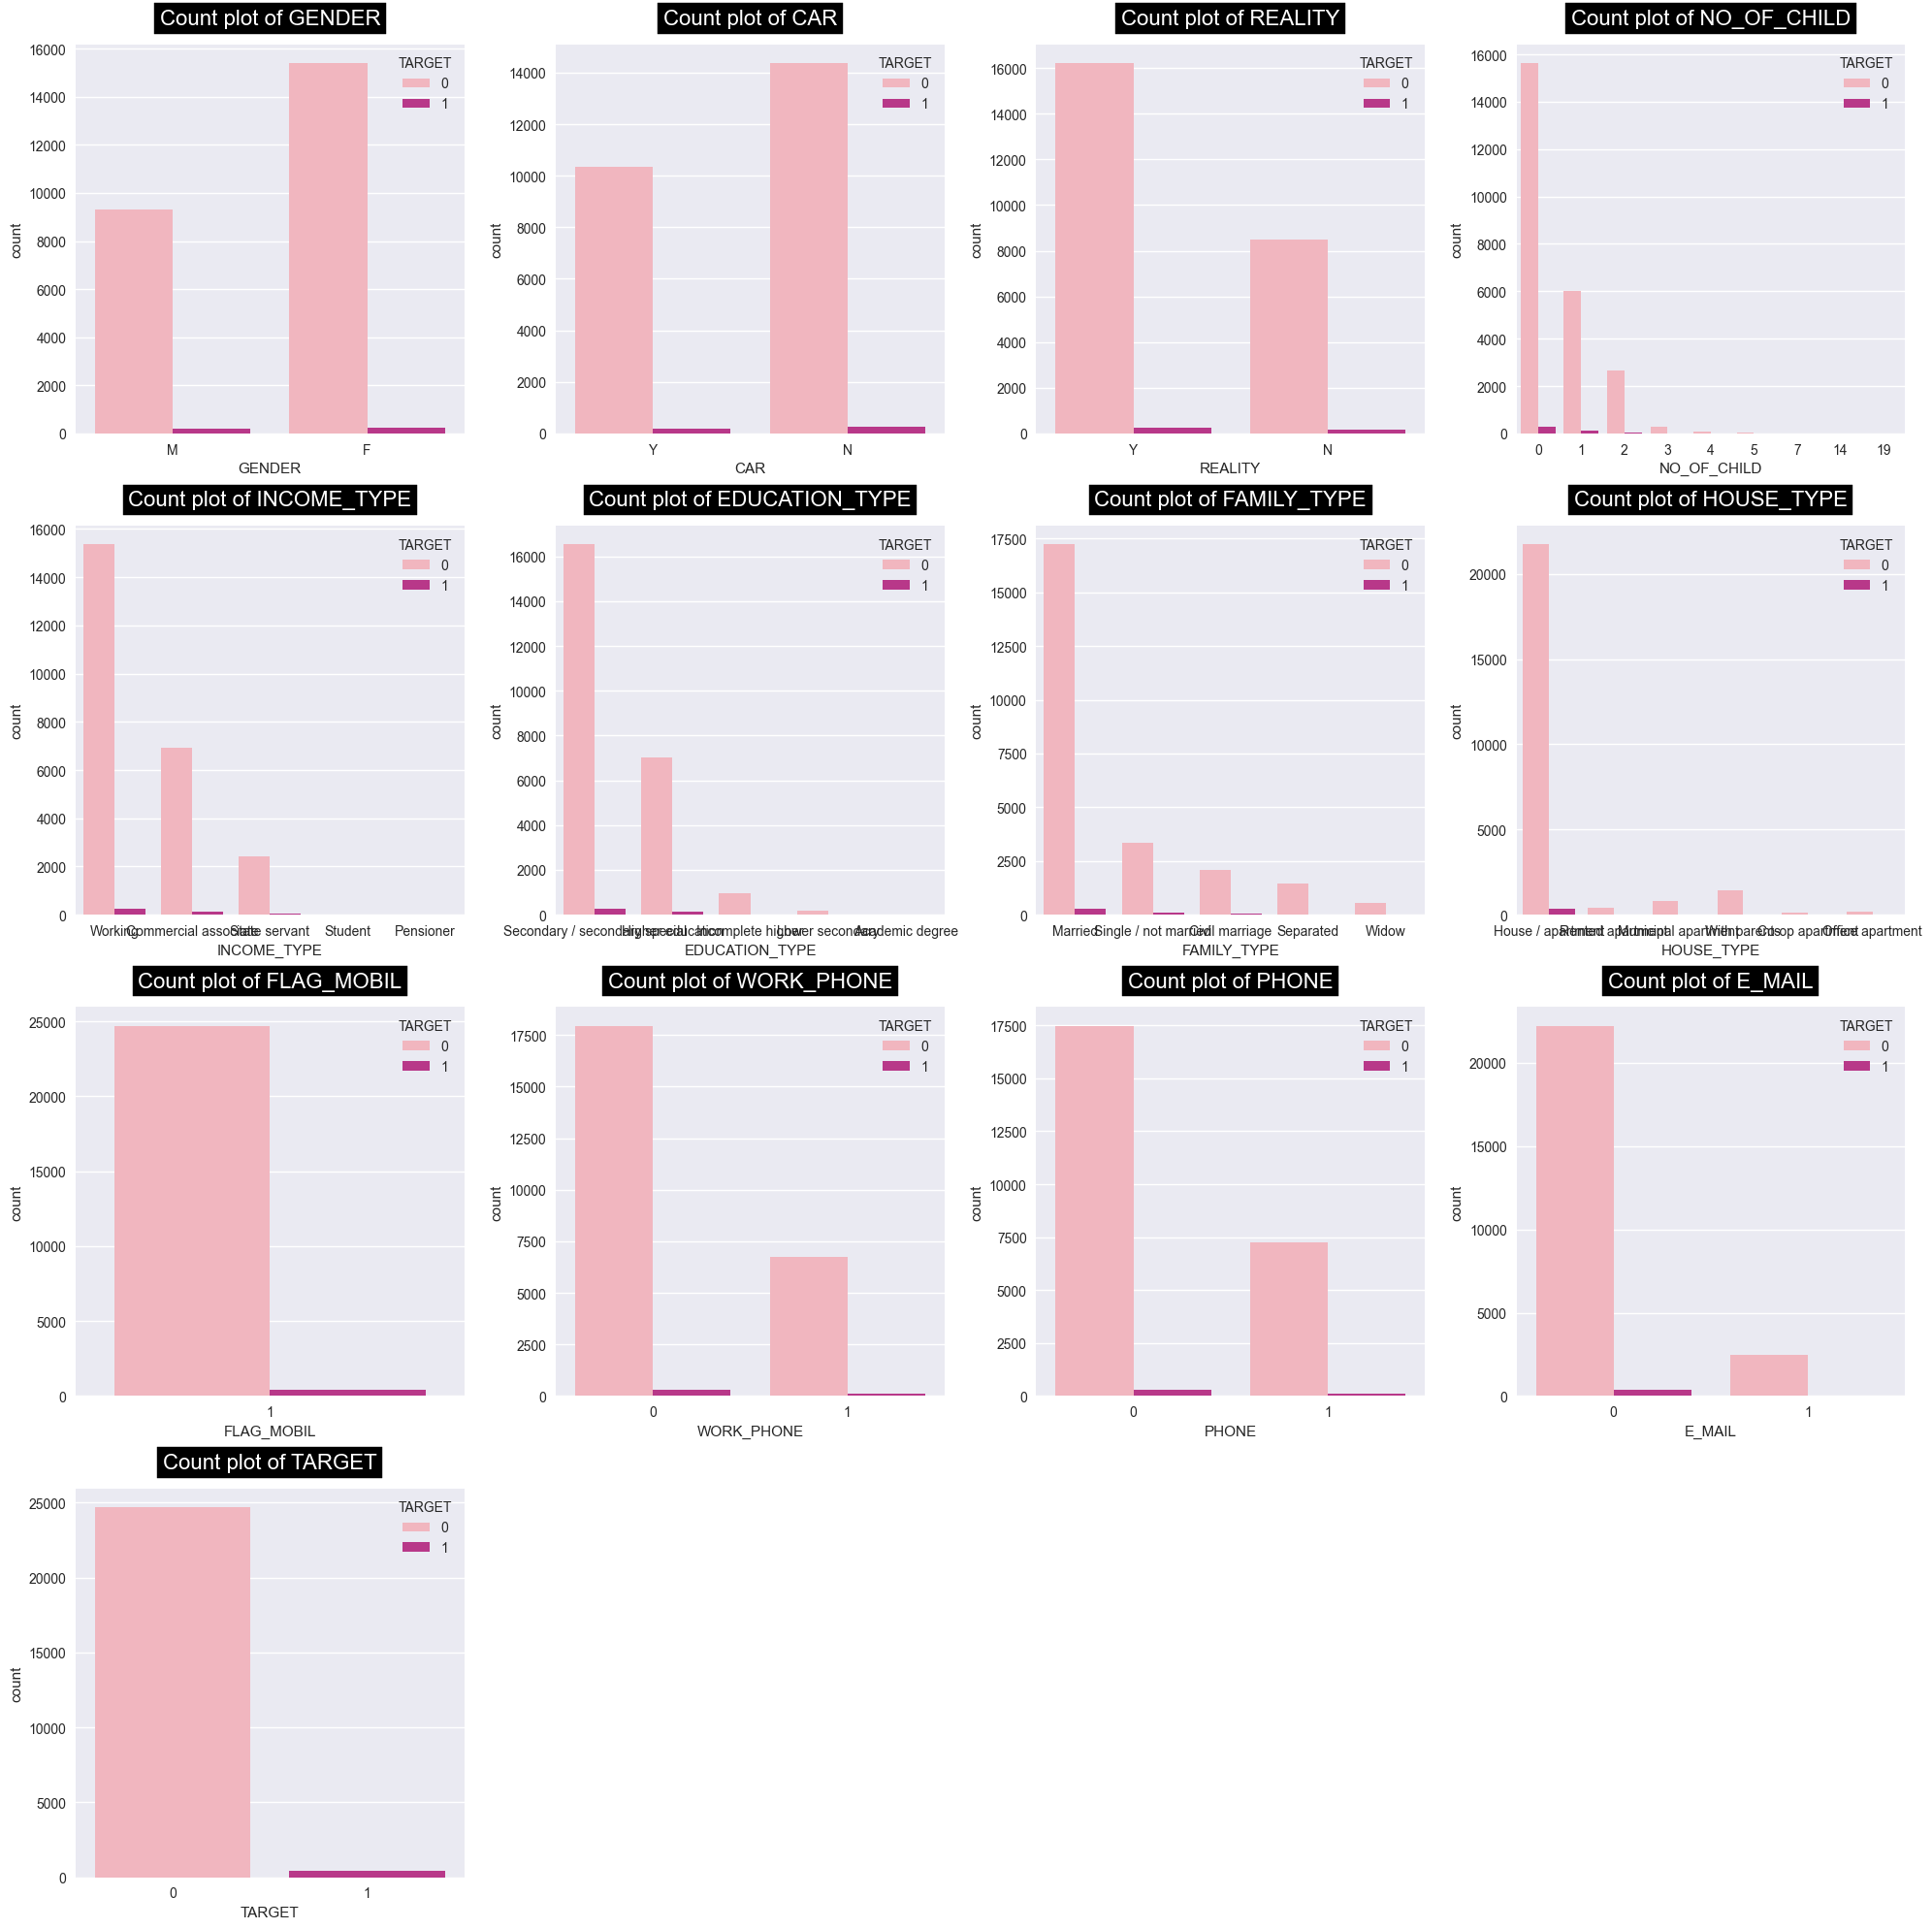

In [10]:
cat_df_visualize = cat_df.copy()
cat_df_visualize['TARGET'] = df['TARGET']

utils.custom_countplot(
    df=cat_df_visualize, target='TARGET', ncols=4, figsize=(20, 20), color='RdPu'
)

> Insight: The number of label '0' is more than the number of label '1'.

Now we draw pie plot to see the quatity of distinct value in each column.

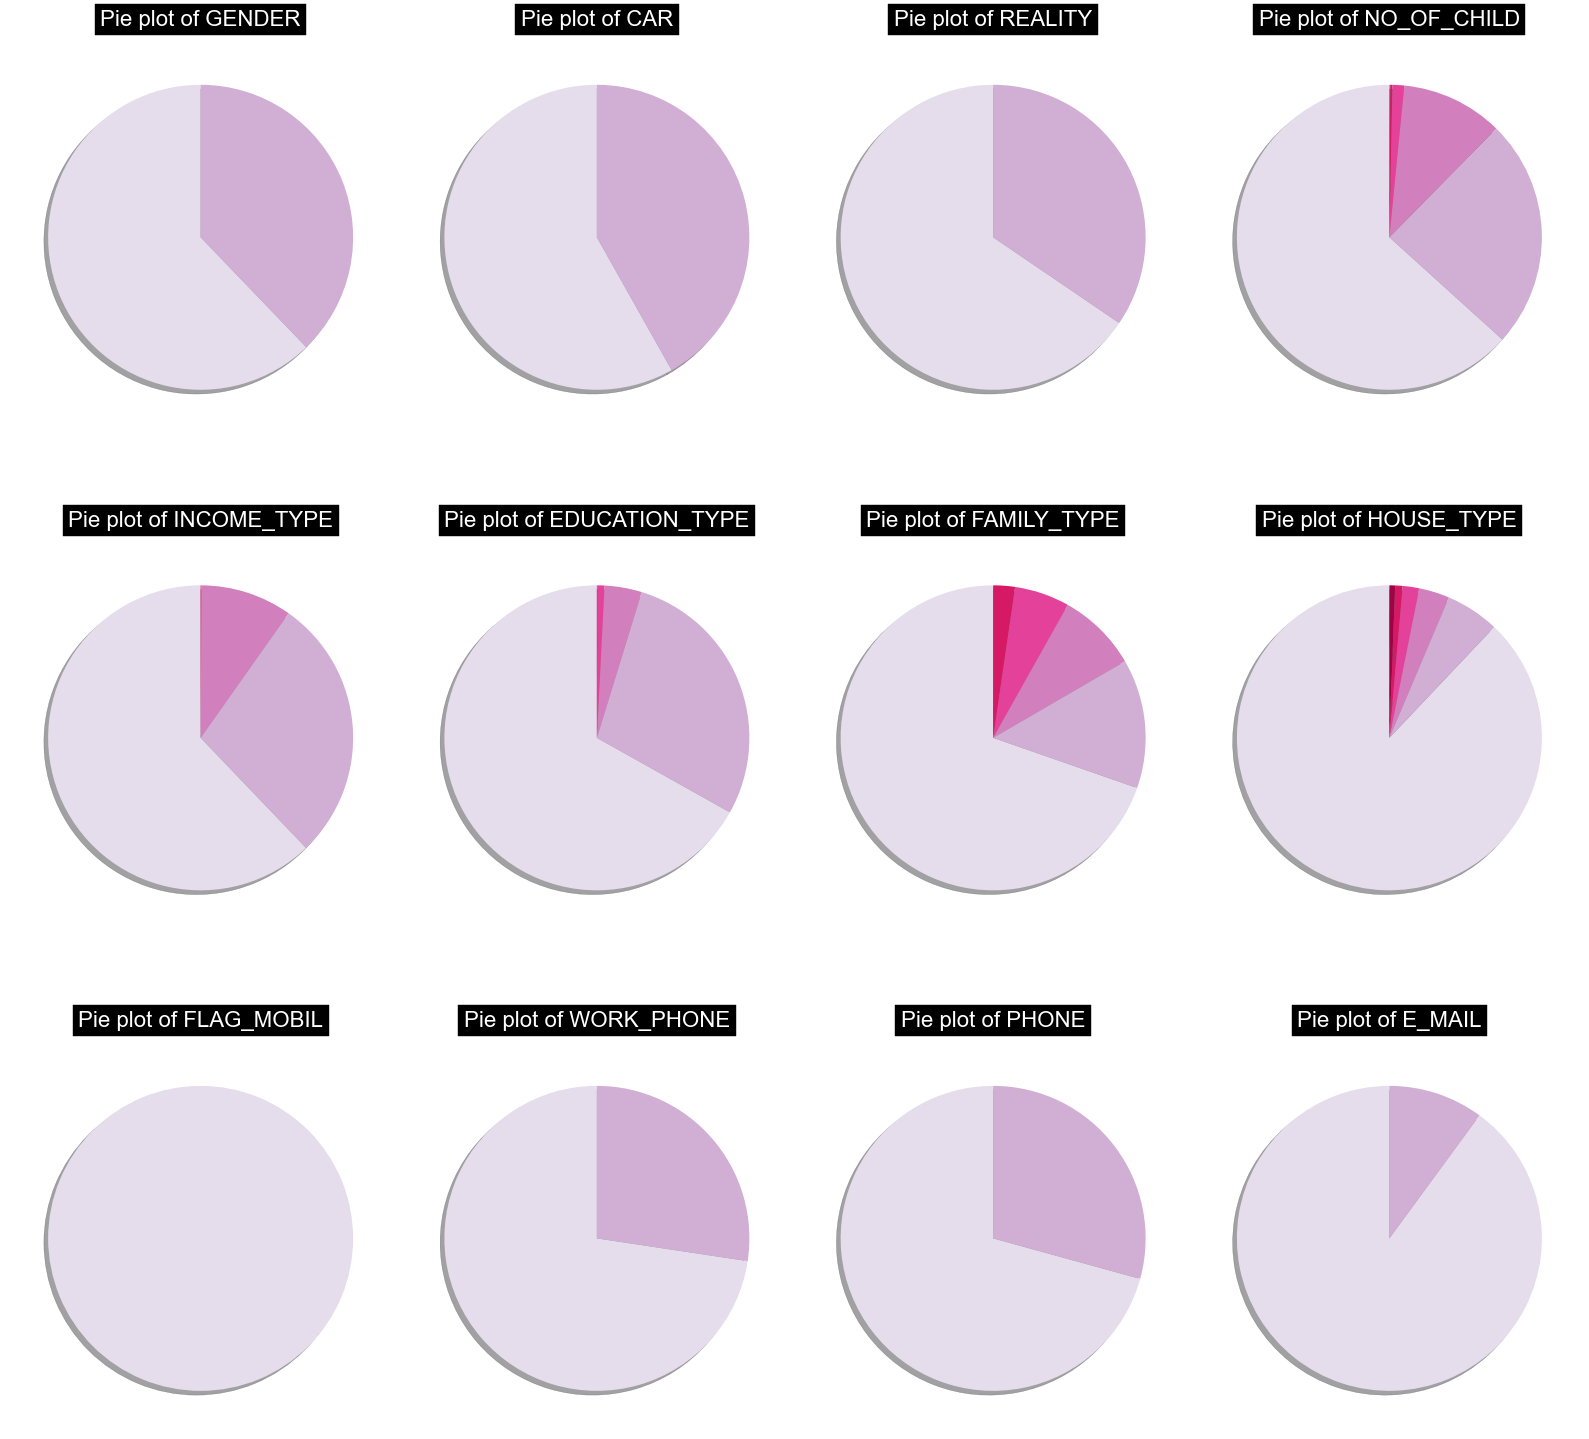

In [11]:
utils.custom_pieplot(df=cat_df, ncols=4, figsize=(16, 16), color=color)

> Insight: **'FLAG_MOBIL'** column is not useful, because it has only one value. So, I will drop it.

<br>
<h3 align='center'>
<span style='background:cornsilk; color:palevioletred'>
<b>
2.3 | Visualize Numeric data
</b>
</span>
</h3>

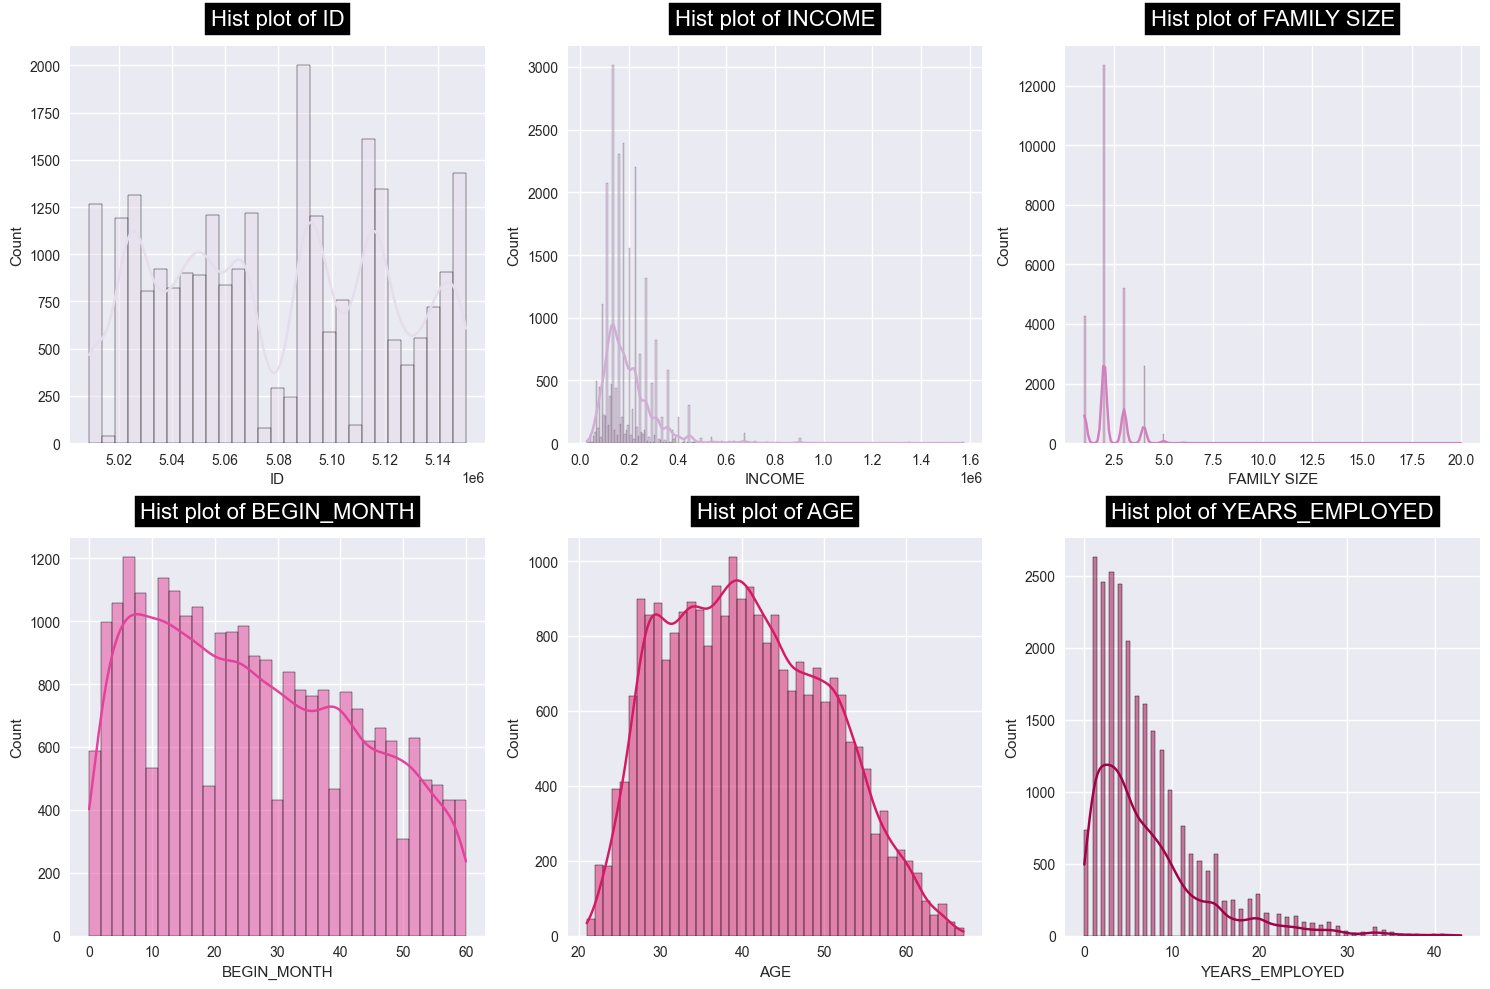

In [12]:
utils.custom_histplot(df=num_df, ncols=3, figsize=(15, 10), color='PuRd')

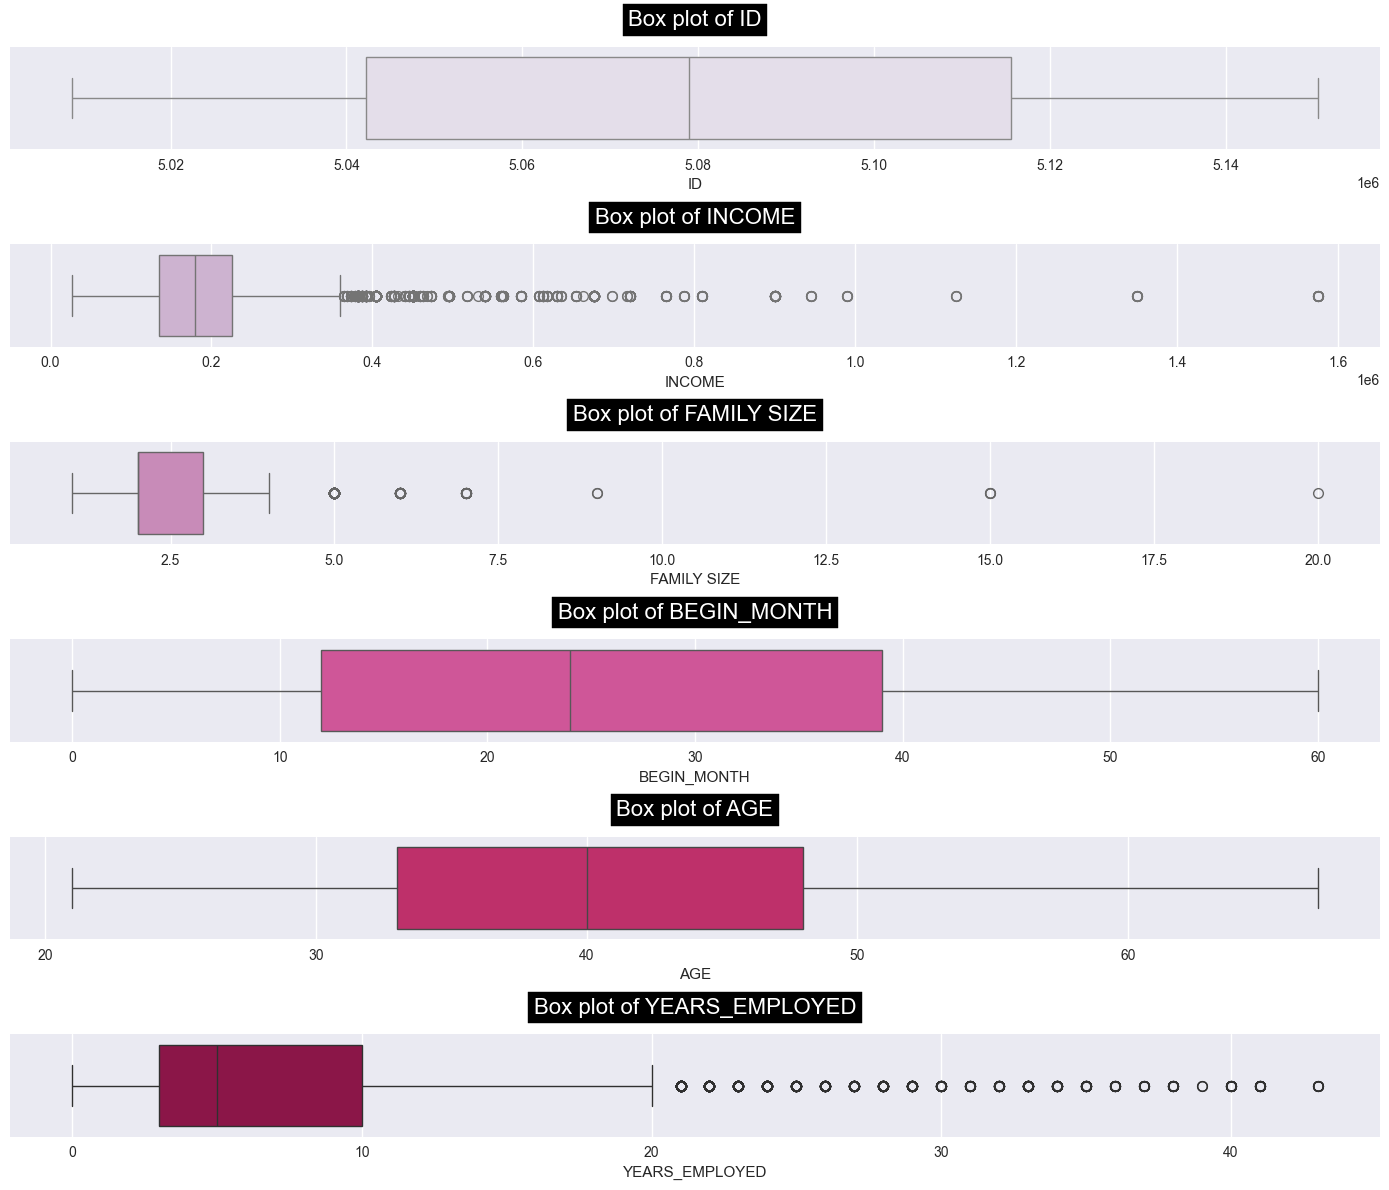

In [13]:
# Check the outliers
utils.custom_boxplot(df=num_df, ncols=1, color=color)

<br>

<h2 align='center'>
<span style='background:black; color:yellow'>
<b>
3 | Data Preprocessing
</b>
</h2>

First, I remove the **'FLAG_MOBIL'** column. Besides, we know **'ID'** doesn't affect our target, so I remove it too.

In [14]:
target = df['TARGET']
df_ = df.drop(columns=['ID', 'FLAG_MOBIL', 'TARGET'])
cat_df = cat_df.drop(columns=['FLAG_MOBIL'])
num_df = num_df.drop(columns='ID')

<br>
<h3 align='center'>
<span style='background:cornsilk; color:palevioletred'>
<b>
3.1 | Normalization
</b>
</span>
</h3>

In [15]:
from sklearn.preprocessing import RobustScaler

def normalize(df: pd.DataFrame) -> tuple:
    '''
        Normalize a dataframe
    '''
    cat_df = df.select_dtypes(exclude='number')

    # Normalize Categorical data
    df = pd.get_dummies(
        df, columns=cat_df.columns, drop_first=True, dtype=int
    )

    # Normalize Numerical data
    normalized_data = RobustScaler().fit_transform(df)

    return df, normalized_data

In [16]:
dummied_df, normalized_data = normalize(df_.copy())

<br>
<h3 align='center'>
<span style='background:cornsilk; color:palevioletred'>
<b>
3.2 | Outlier Detection
</b>
</span>
</h3>

Now I will check the outliers again after normalizing the data. I will try using pca to reduce the dimensionality and visualize again with scatter plot.

In [17]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_data = pca.fit_transform(normalized_data)

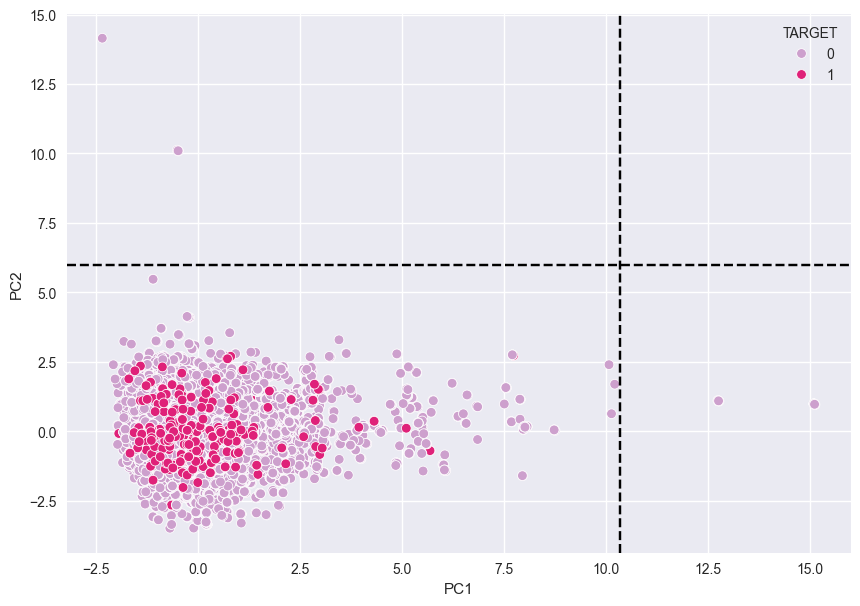

In [18]:
sns.scatterplot(
    x=pca_data[:, 0], y=pca_data[:, 1], hue=target, palette=color
)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.axvline(x=10.35, color='black', linestyle='--')
plt.axhline(y=6, color='black', linestyle='--')
plt.show()

> Insight: Based on the plot, we will remove the data samples which have PC1 greater than 10.35 or PC2 greater than 6.0.

In [19]:
outliers = np.where((pca_data[:, 0] > 10.35) | (pca_data[:, 1] > 6.0))[0]
outliers

array([  520,   521,   522,   523,   524,   525,  9938,  9939,  9940,
       17286, 23433, 23434, 23435, 23436, 23437, 23438, 23439, 23440])

Now we try to drop them:

In [20]:
print(f'Data shape Before removing outliers: {normalized_data.shape}')
print(f'Target shape Before removing outliers: {target.shape}')

preprocessed_df = pd.DataFrame(
    normalized_data, columns=dummied_df.columns
).drop(outliers, errors='ignore')
target = target.drop(outliers, errors='ignore')

print(f'Data shape After removing outliers: {preprocessed_df.shape}')
print(f'Target shape After removing outliers: {target.shape}')

Data shape Before removing outliers: (25134, 36)
Target shape Before removing outliers: (25134,)
Data shape After removing outliers: (25116, 36)
Target shape After removing outliers: (25116,)


<br>

<h2 align='center'>
<span style='background:black; color:yellow'>
<b>
4 | Feature Engineering
</b>
</h2>

In [21]:
fe_df = pd.concat([preprocessed_df, target], axis=1)
fe_df.head(3)

,INCOME,FAMILY SIZE,BEGIN_MONTH,AGE,YEARS_EMPLOYED,GENDER_M,CAR_Y,REALITY_Y,NO_OF_CHILD_1,NO_OF_CHILD_2,...,FAMILY_TYPE_Widow,HOUSE_TYPE_House / apartment,HOUSE_TYPE_Municipal apartment,HOUSE_TYPE_Office apartment,HOUSE_TYPE_Rented apartment,HOUSE_TYPE_With parents,WORK_PHONE_1,PHONE_1,E_MAIL_1,TARGET
0,-0.75,0.0,0.185185,1.266667,-0.285714,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,1.00,-1.0,-0.740741,0.800000,0.428571,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0
2,1.00,-1.0,0.074074,0.800000,0.428571,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0


In [22]:
list(num_df.columns)

['INCOME', 'FAMILY SIZE', 'BEGIN_MONTH', 'AGE', 'YEARS_EMPLOYED']

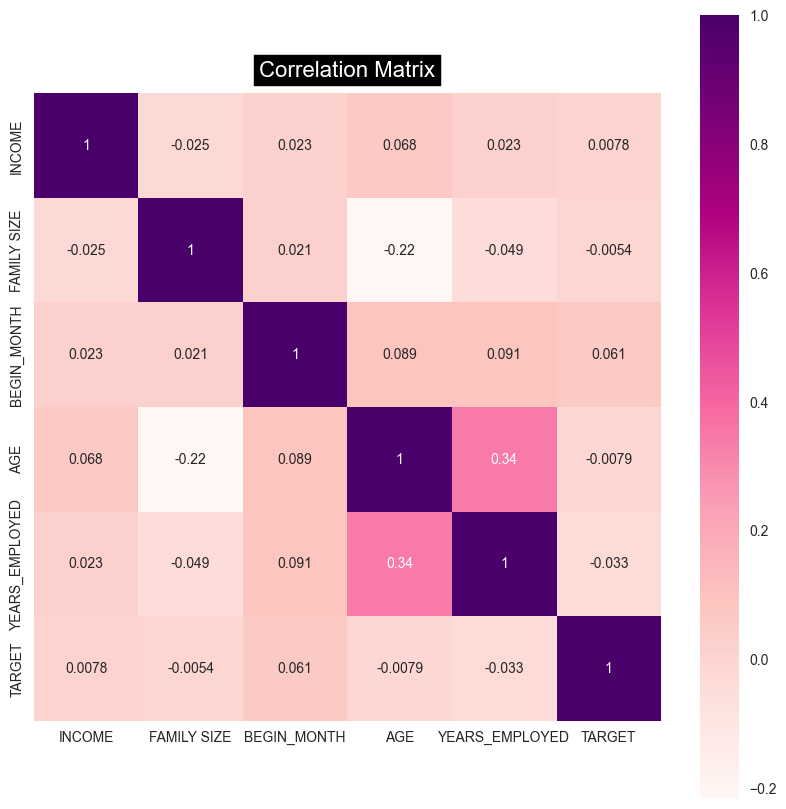

In [23]:
# Draw heatmap of numeric data
num_cols = list(num_df.columns)
num_cols.append('TARGET')
utils.custom_heatmap(df=fe_df[num_cols], figsize=(8, 8), color='RdPu')

In [24]:
pca = PCA(n_components=len(fe_df.columns)-1)
pca_result = pca.fit_transform(fe_df)

print(np.round(100 * pca.explained_variance_ratio_, 4))

[1.95388e+01 1.63732e+01 1.35089e+01 6.24110e+00 5.57270e+00 5.02970e+00
 4.52250e+00 4.27100e+00 3.51800e+00 3.16270e+00 2.72060e+00 2.47470e+00
 2.28000e+00 1.95530e+00 1.75300e+00 1.31030e+00 1.19130e+00 9.65200e-01
 8.40100e-01 6.05400e-01 5.47200e-01 4.54300e-01 3.14000e-01 2.47100e-01
 2.00600e-01 1.45200e-01 1.40300e-01 6.51000e-02 1.91000e-02 1.46000e-02
 7.50000e-03 6.00000e-03 2.30000e-03 2.10000e-03 3.00000e-04 0.00000e+00]


In [44]:
explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
threshold = 0.98

n_components = np.argmax(explained_variance_ratio >= threshold) + 1
print(f'Total variance kept: {n_components}')

Total variance kept: 21


In [45]:
pca = PCA(n_components=n_components)
reduced_data = pca.fit_transform(fe_df)

<br>

<h2 align='center'>
<span style='background:black; color:yellow'>
<b>
5 | Split data
</b>
</h2>

In [47]:
from sklearn.model_selection import train_test_split

RANDOM_STATE = 123
TRAIN_SIZE = 0.8

X, y = reduced_data, np.array(target.astype(int)).reshape(-1, 1)

trainX, testX ,trainY, testY = train_test_split(
    X, y, train_size=TRAIN_SIZE, random_state=RANDOM_STATE, shuffle=True
)
print(f'Train X shape: {trainX.shape}')
print(f'Train y shape: {trainY.shape}')
print(f'Test X shape: {testX.shape}')
print(f'Test y shape: {testY.shape}')

Train X shape: (20092, 21)
Train y shape: (20092, 1)
Test X shape: (5024, 21)
Test y shape: (5024, 1)


<br>

<h2 align='center'>
<span style='background:black; color:yellow'>
<b>
7 | Build SVM model
</b>
</h2>

In [57]:
from sklearn.pipeline import Pipeline
from sklearn.base import ClassifierMixin
from typing import Dict, Any
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from imblearn.combine import SMOTEENN


def tune_model(
    model: ClassifierMixin,
    param_grid: Dict[str, list],
    X_train: np.array,
    y_train: np.array,
    cv: int = 5,
    scoring: str = 'f1'
) -> Dict[str, Any]:
    '''
        Find the best params for your model above (including your best params)
        :param model: the model you have design
        :return: a model with best params
    '''
    grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grid,
        cv=cv,
        scoring=scoring,
        n_jobs=-1,
        verbose=1
    )
    grid_search.fit(X_train, y_train)
    return grid_search


def model_svm(
    X_train: np.array,
    y_train: np.array,
    X_test: np.array,
    y_test: np.array
) -> None:
    
    clf = SVC(random_state=RANDOM_STATE)
    # sm = SMOTEENN(random_state=RANDOM_STATE)
    pipe = Pipeline(steps=[
        ('svc', clf)
        # ('smote', sm),
    ])

    param_grid = {
        'svc__C': [0.1, 1, 10, 100],
        'svc__gamma': ['scale', 0.001, 0.005],
        # 'smote__sampling_strategy': [0.5, 0.25, 0.15, 0]
    }

    search = tune_model(
        model=pipe, 
        param_grid=param_grid, 
        X_train=X_train, 
        y_train=y_train, 
        cv=5
    )
    y_pred = search.predict(X_test)

    utils.calculate_performance(y_test, y_pred)

In [58]:
model_svm(trainX, trainY, testX, testY)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


/Users/trantrieunghi/Desktop/NMMH/Lab/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/trantrieunghi/Desktop/NMMH/Lab/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/trantrieunghi/Desktop/NMMH/Lab/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/trantrieunghi/Desktop/NMMH/Lab/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataC

Precision: 0.4117647058823529
Recall: 0.23333333333333334
Accuracy: 0.9802945859872612
F1: 0.2978723404255319
Confusion matrix:
[[4904   30]
 [  69   21]]
Classification report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4934
           1       0.41      0.23      0.30        90

    accuracy                           0.98      5024
   macro avg       0.70      0.61      0.64      5024
weighted avg       0.98      0.98      0.98      5024



<br>

<h2 align='center'>
<span style='background:black; color:yellow'>
<b>
7 | Build MLP model
</b>
</h2>

In [ ]:
from sklearn.neural_network import MLPClassifier


def model_mlp(
    X_train: np.array,
    y_train: np.array,
    X_test: np.array,
    y_test: np.array
) -> None:
    
    clf = MLPClassifier(random_state=RANDOM_STATE)
    pipe = Pipeline(steps=[
        ('mlp', clf)
    ])

    param_grid = {
        'mlp__hidden_layer_sizes': [(100,), (200,)],
        'mlp__activation': ['relu', 'logistic'],
        'mlp__alpha': [0.0001, 0.001],
        'mlp__learning_rate': ['constant', 'adaptive'],
        'mlp__max_iter': [500, 800]
    }

    search = tune_model(
        model=pipe, param_grid=param_grid, X_train=X_train, y_train=y_train, cv=5
    )
    y_pred = search.predict(X_test)

    utils.calculate_performance(y_test, y_pred)

In [60]:
model_mlp(trainX, trainY, testX, testY)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


/Users/trantrieunghi/Desktop/NMMH/Lab/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1124: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/trantrieunghi/Desktop/NMMH/Lab/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1124: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/trantrieunghi/Desktop/NMMH/Lab/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1124: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/trantrieunghi/Desktop/NMMH/Lab/.venv/lib/p

Precision: 0.5918367346938775
Recall: 0.32222222222222224
Accuracy: 0.9838773885350318
F1: 0.4172661870503597
Confusion matrix:
[[4914   20]
 [  61   29]]
Classification report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4934
           1       0.59      0.32      0.42        90

    accuracy                           0.98      5024
   macro avg       0.79      0.66      0.70      5024
weighted avg       0.98      0.98      0.98      5024

